### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
benguerir_url = "https://weather.com/weather/tenday/l/Benguerir+Morocco+MAXX0004:1:MA"
tanger_url = "https://weather.com/weather/tenday/l/Tanger+Tanger-Tetouan-Al+Hoceima+Morocco+MAXX0107:1:MA"

benguerir_html = requests.get(benguerir_url).content
tanger_html = requests.get(tanger_url).content

In [22]:
weather_data = pd.DataFrame(columns=["date", "time", "temperature", "description"])

In [56]:
benguerir_soup = BeautifulSoup(benguerir_html, "html.parser")
tanger_soup = BeautifulSoup(tanger_html, "html.parser")

benguerir_forecast_data = benguerir_soup.find_all("span", class_="description")
benguerir_temperature_data = benguerir_soup.find_all("td", class_="temp")


tanger_forecast_data = tanger_soup.find_all("span", class_="description")
tanger_temperature_data = tanger_soup.find_all("td", class_="temp")

list_benguerir =[]
#all = soup.find("div", {"class":"locations-title ten-day-page-title"}).find("h1").text

content = benguerir_soup.find_all("table", {"class":"twc-table"})
print("content ",content)
for items in content:
    
    for i in range(len(items.find_all("tr"))-1):
        dict = {}
        try:
            
            dict["day"]= items.find_all("span", {"class":"date-time"})[i].text
            dict["date"]= items.find_all("span", {"class":"day-detail"})[i].text
            dict["desc"]= items.find_all("td", {"class":"description"})[i].text
            dict["temp"]= items.find_all("td", {"class":"temp"})[i].text
            dict["precip"]= items.find_all("td", {"class":"precip"})[i].text
            dict["wind"]= items.find_all("td", {"class":"wind"})[i].text
            dict["humidity"]= items.find_all("td", {"class":"humidity"})[i].text
        except:

            dict["day"]="None"
            dict["date"]="None"
            dict["desc"]="None"
            dict["temp"]="None"
            dict["precip"]="None"
            dict["wind"]="None"
            dict["humidity"]="None"

        list_benguerir.append(dict)


data = pd.DataFrame(list_benguerir)
data.head()


content  None


TypeError: 'NoneType' object is not iterable

In [40]:
print(weather_data)

Empty DataFrame
Columns: [date, time, temperature, description]
Index: []


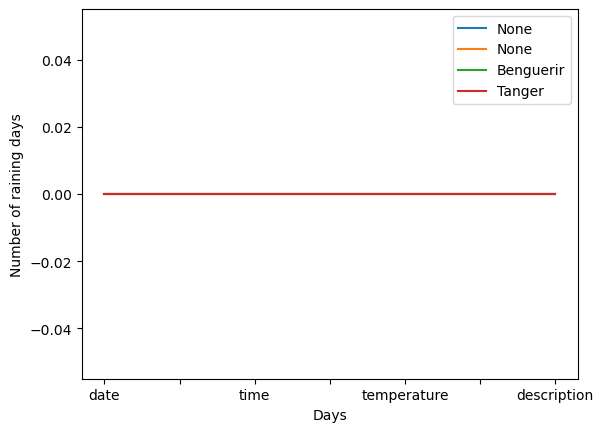

In [41]:
benguerir_rain_data = weather_data.loc[weather_data["description"].str.contains("Rain")]

benguerir_rain_count = benguerir_rain_data.count()

benguerir_rain_count.plot(kind="line")

tanger_rain_data = weather_data.loc[weather_data["description"].str.contains("Rain")]

tanger_rain_count = tanger_rain_data.count()

tanger_rain_count.plot(kind="line")

benguerir_rain_count.plot(kind="line", label="Benguerir")
tanger_rain_count.plot(kind="line", label="Tanger")

plt.xlabel("Days")
plt.ylabel("Number of raining days")
plt.legend()

plt.show()
